In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",100)

In [3]:
inspect = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

In [4]:
inspect.head(2)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41686218,BEIT JEDDO,BROOKLYN,6917,5 AVENUE,11209,7189211120,Middle Eastern,04/06/2013,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,12,NaN,NaN,06/16/2016,Pre-permit (Operational) / Initial Inspection
1,40931239,PIO PIO EXPRESS,MANHATTAN,1746,1 AVENUE,10128,2124265800,Peruvian,07/21/2014,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,28,NaN,NaN,06/16/2016,Cycle Inspection / Initial Inspection


^ Points to differences and inconsistencies in counting types amongst the boroughs.

In [5]:
r_boro_g = inspect.groupby(['CUISINE DESCRIPTION', 'SCORE'])['CAMIS'].count().unstack('CUISINE DESCRIPTION')

In [6]:
# r_boro_g

In [7]:
inspect[(inspect['BORO'] == 'STATEN ISLAND') & (inspect['CUISINE DESCRIPTION'] == 'Vegetarian')]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE


In [8]:
# sns.violinplot(data=inspect[['CUISINE DESCRIPTION', 'SCORE']].T.unstack("SCORE"), palette="Set3", bw=.2, cut=1, linewidth=1)

In [9]:
# inspect[['CUISINE DESCRIPTION', 'SCORE']].set_index("CUISINE DESCRIPTION")

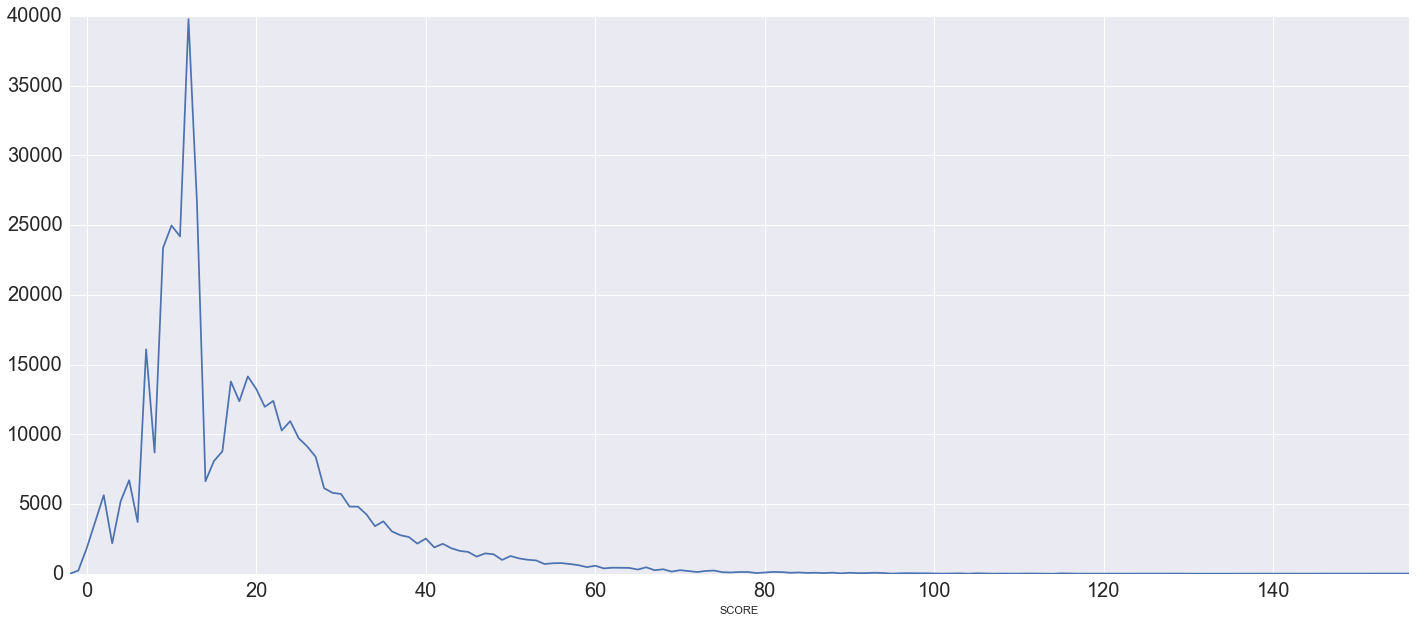

In [10]:
inspect.groupby(['SCORE']).count()['CAMIS'].plot(figsize=(24, 10), fontsize=20)

A `B` starts at 15. Notice the very prominent spike and dip. This fact was observed by Ben Wellington many moons ago.

Wellington also smoothed it over the demonstrate how nicely these ratings smooth onto a regular curve otherwise.

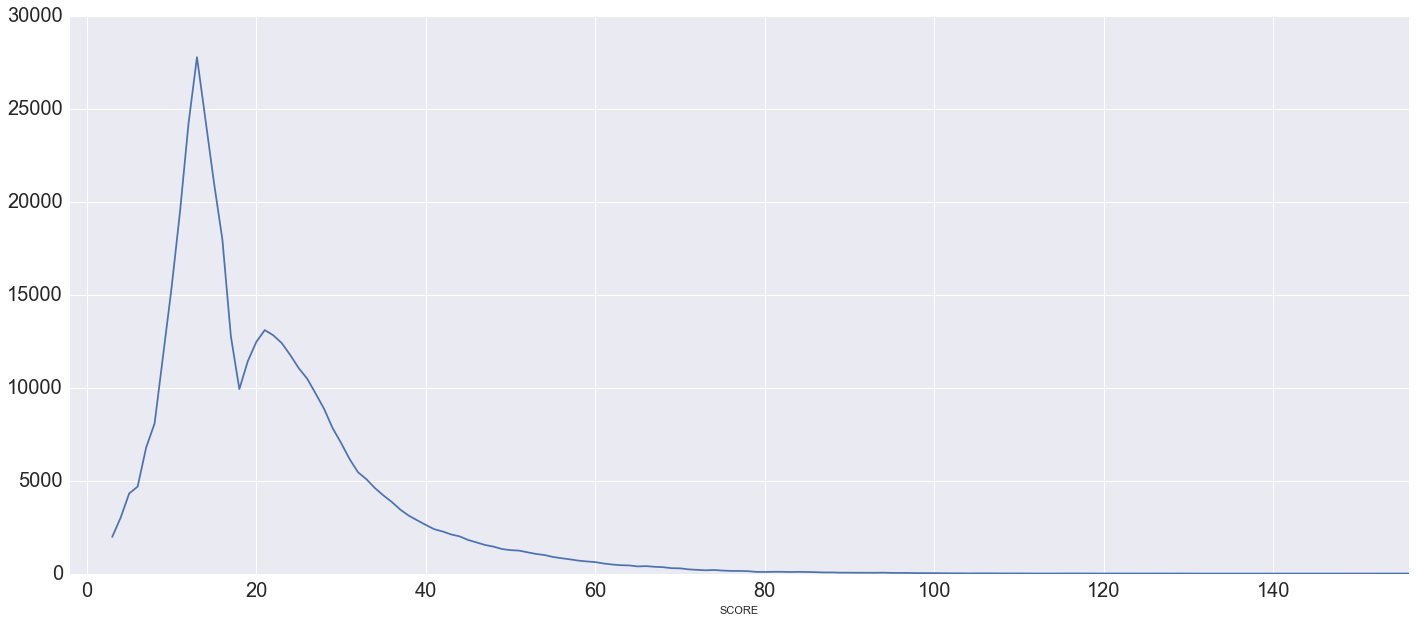

In [11]:
pd.rolling_mean(inspect.groupby(['SCORE']).count()['CAMIS'], window=5).plot(figsize=(24, 10), fontsize=20)

K, simple rolling mean worked really crappy.

Time to use KDE!

C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


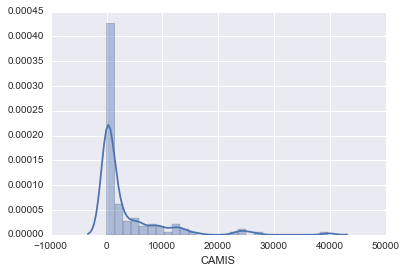

In [12]:
sns.distplot(inspect.groupby(['SCORE']).count()['CAMIS'])

[(0, 100)]

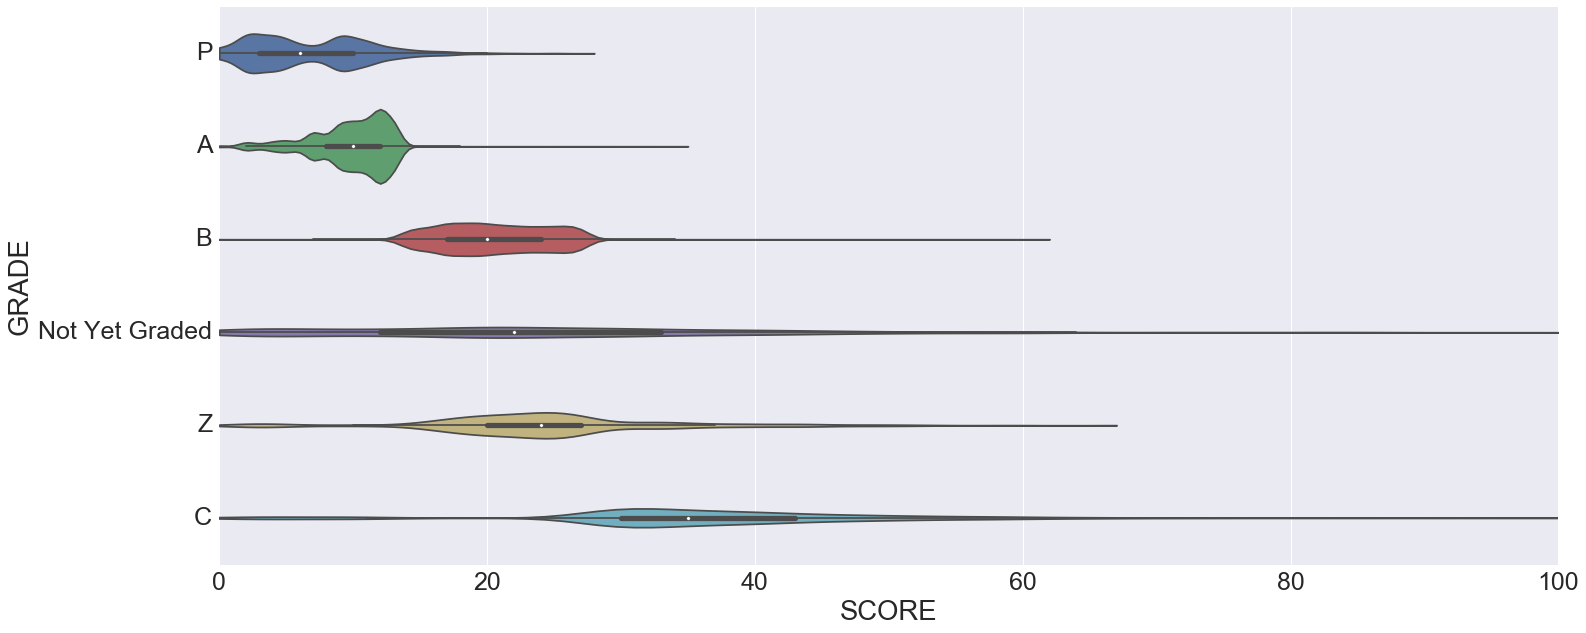

In [13]:
sns.set(font_scale=2.5)
f, ax = plt.subplots(figsize=(24, 10))
sort_order = inspect.groupby(['GRADE']).median().sort_values(by='SCORE').index
# ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=20)
# ax.set_yticklabels(ax.yaxis.get_majorticklabels(), fontsize=30)
# ax.set_yticklabels(ax.yaxis.get_majorticklabels(), fontsize=30)
# ax.set_yticklabels(ax0.yaxis.get_majorticklabels(), rotation=0, fontsize=fontsize)
sns.violinplot(data=inspect, # DataFrame to map.
               x='SCORE',
               y='GRADE',
               order=sort_order, # Can/must be specified manually. Will be by number of observations otherwise.
               cut=0, # Cuts off values exactly at the end of the charting.
               bw=.2 # Changes the smoothness of the resultant curve.
              )
ax.set(xlim=(0, 100))

A boxplot:

[(0, 160)]

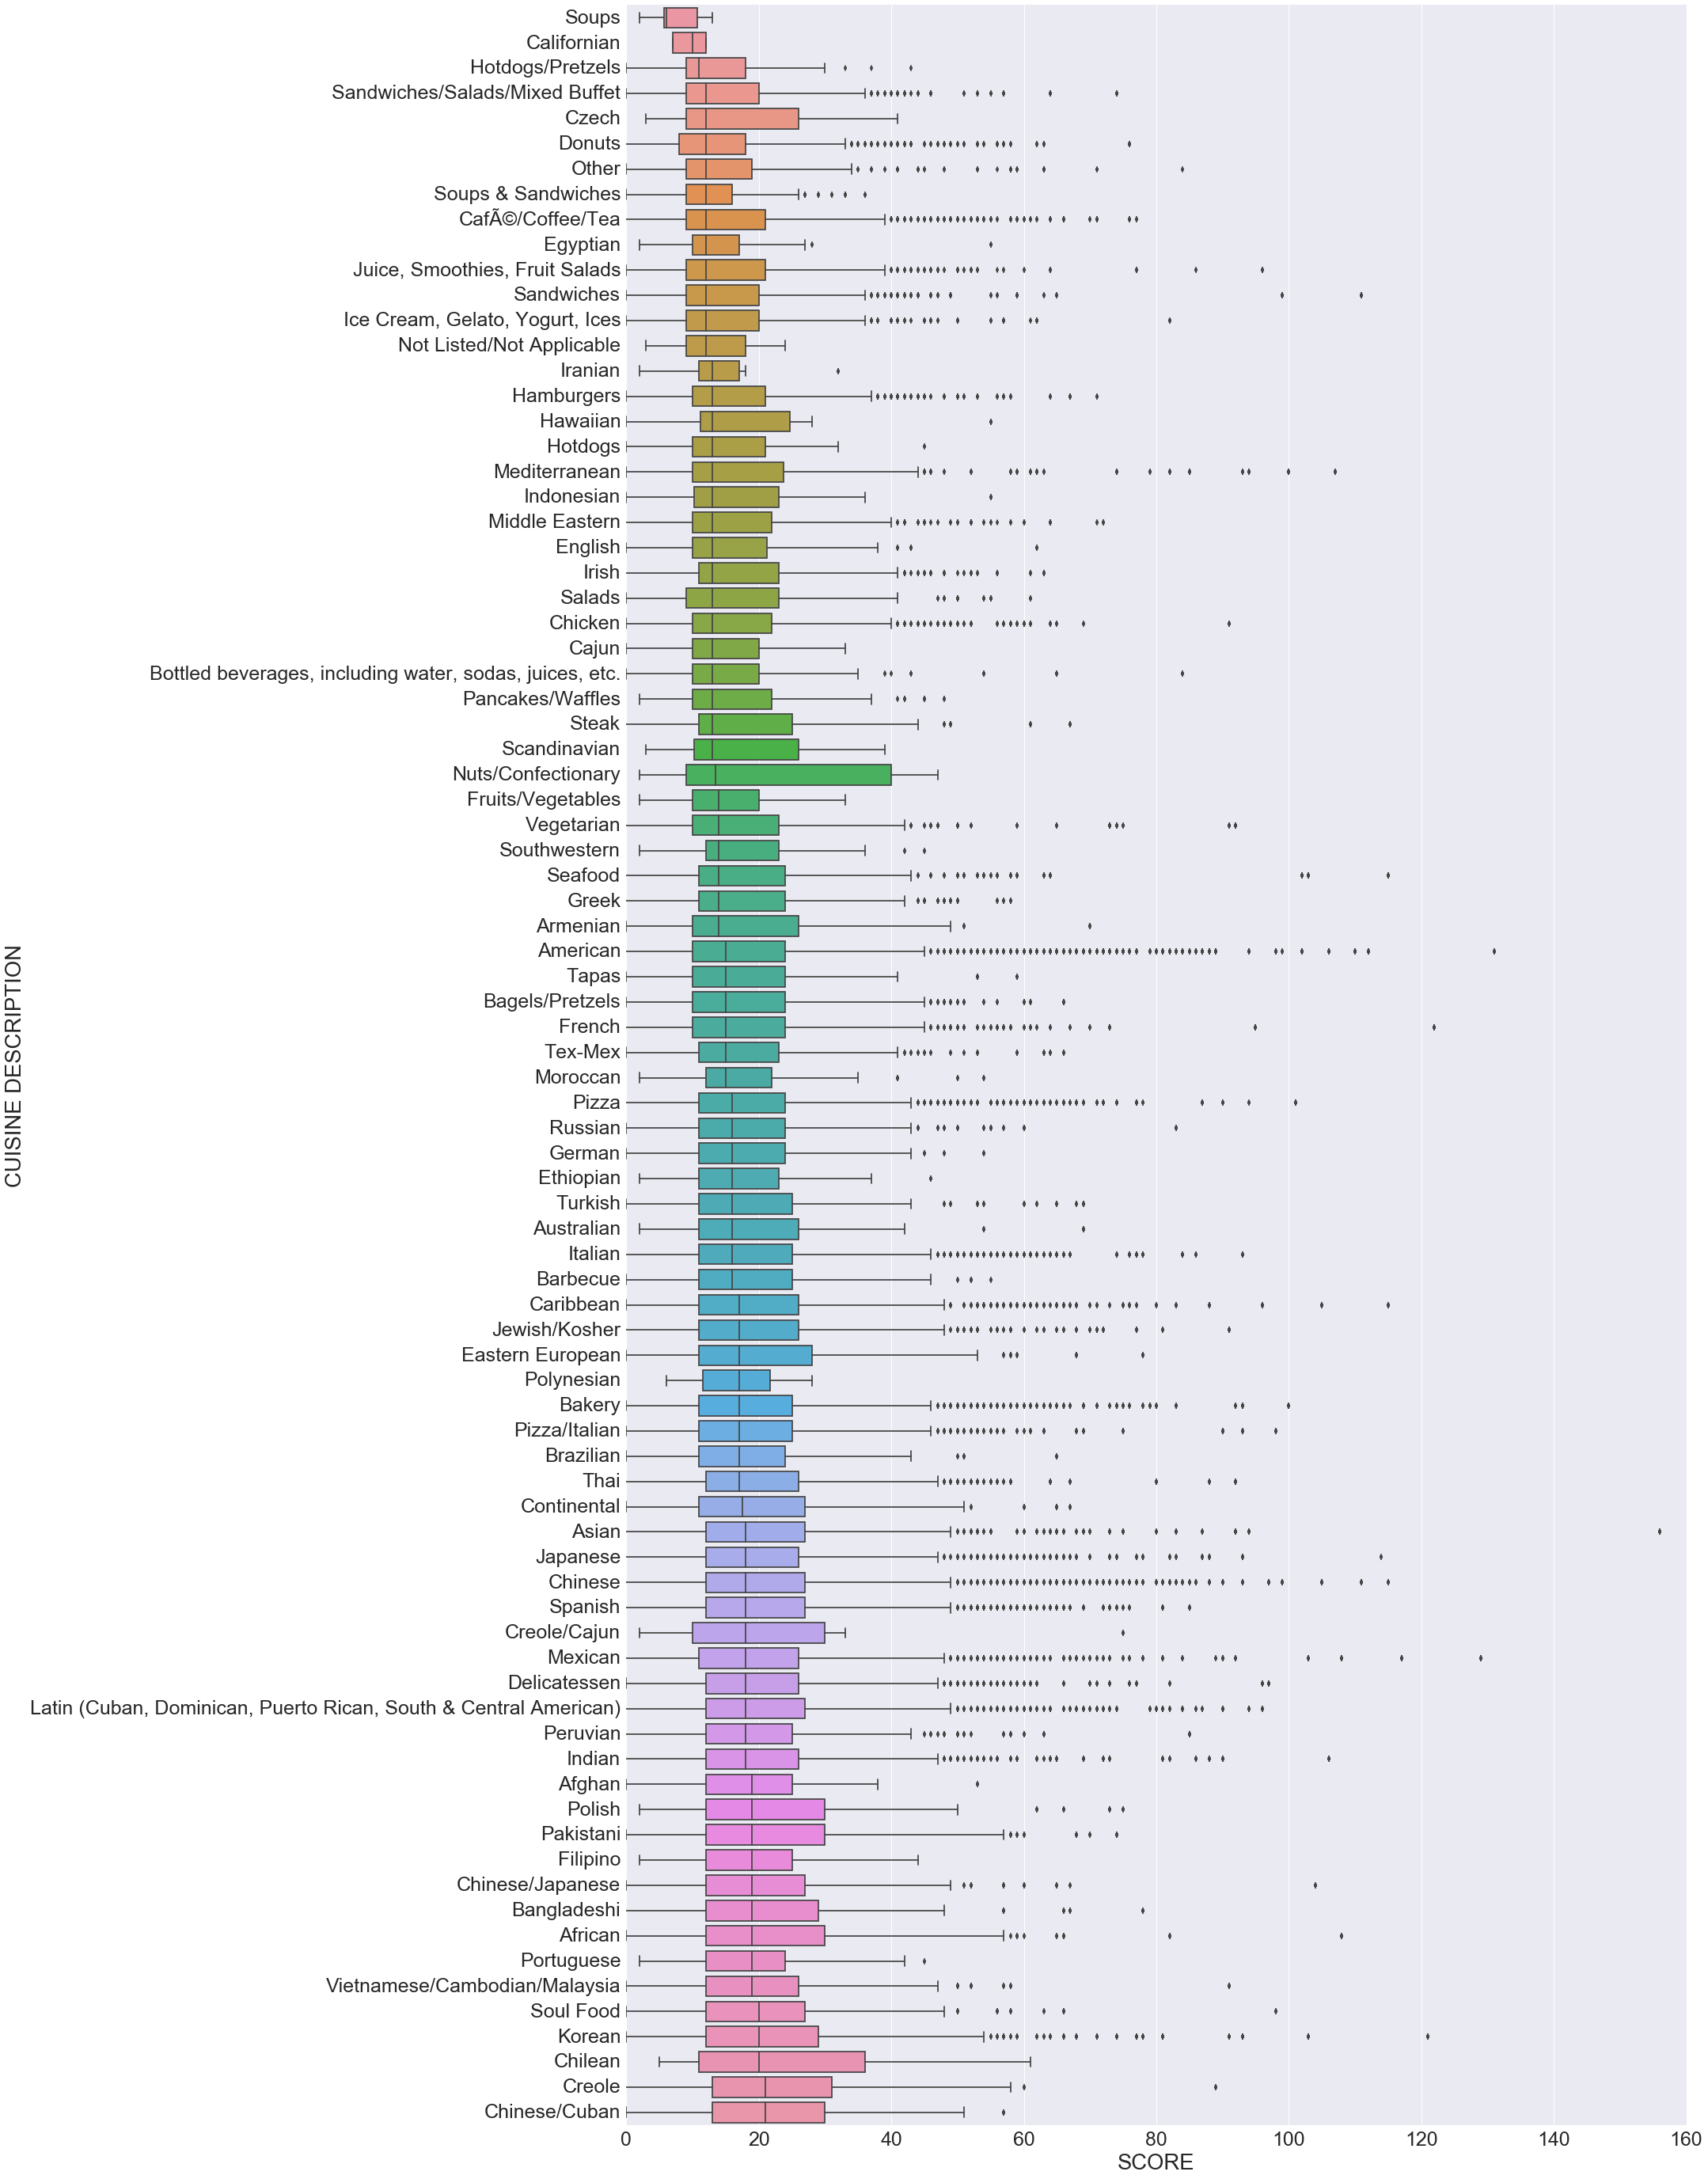

In [14]:
sns.set(font_scale=2.5)
f, ax = plt.subplots(figsize=(24, 48))
sort_order = inspect.groupby(['CUISINE DESCRIPTION']).median().sort_values('SCORE').index
sns.boxplot(data=inspect, # DataFrame to map.
               x='SCORE',
               y='CUISINE DESCRIPTION',
               order=sort_order, # Can/must be specified manually. Will be by number of observations otherwise.
              )
ax.set(xlim=(0, 160))

[(0.95755478915046244, 0.95755478915046244, 0.95755478915046244),
 (0.90120723387774304, 0.90120723387774304, 0.90120723387774304),
 (0.83289505032932054, 0.83289505032932054, 0.83289505032932054),
 (0.75021916137022127, 0.75021916137022127, 0.75021916137022127),
 (0.64341409276513495, 0.64341409276513495, 0.64341409276513495),
 (0.53871589525073182, 0.53871589525073182, 0.53871589525073182),
 (0.44032295626752516, 0.44032295626752516, 0.44032295626752516),
 (0.34288351570858677, 0.34288351570858677, 0.34288351570858677),
 (0.22329873945198808, 0.22329873945198808, 0.22329873945198808),
 (0.1046981975144031, 0.1046981975144031, 0.1046981975144031)]

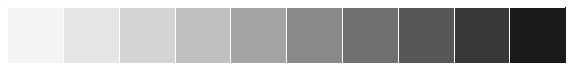

In [15]:
sns.choose_colorbrewer_palette('sequential')

Ok, that's really cool...

C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


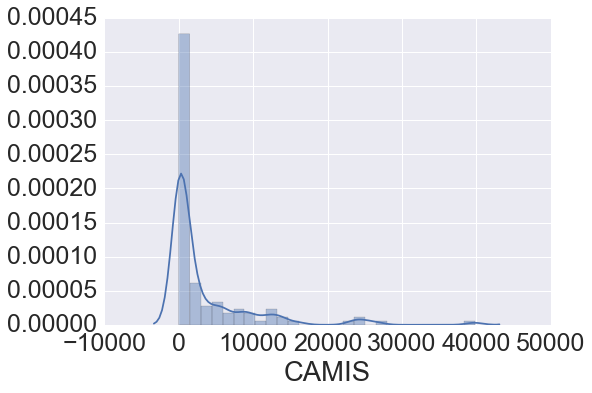

In [16]:
sns.distplot(inspect.groupby(['SCORE']).count()['CAMIS'])

Can do a Guassian instead:

In [17]:
inspect['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection                          253475
Cycle Inspection / Re-inspection                               117896
Pre-permit (Operational) / Initial Inspection                   24458
Pre-permit (Operational) / Re-inspection                        11290
Administrative Miscellaneous / Initial Inspection               10179
Smoke-Free Air Act / Initial Inspection                          4988
Pre-permit (Non-operational) / Initial Inspection                4336
Trans Fat / Initial Inspection                                   3782
Cycle Inspection / Reopening Inspection                          3621
Administrative Miscellaneous / Re-inspection                     3348
Cycle Inspection / Compliance Inspection                         2050
Smoke-Free Air Act / Re-inspection                               1943
Trans Fat / Re-inspection                                        1912
Inter-Agency Task Force / Initial Inspection                     1239
Pre-permit (Operatio

Let's look at top five.

In [18]:
top_5 = inspect.groupby(['INSPECTION TYPE']).count()['CAMIS'].sort_values(ascending=False)[:5].index

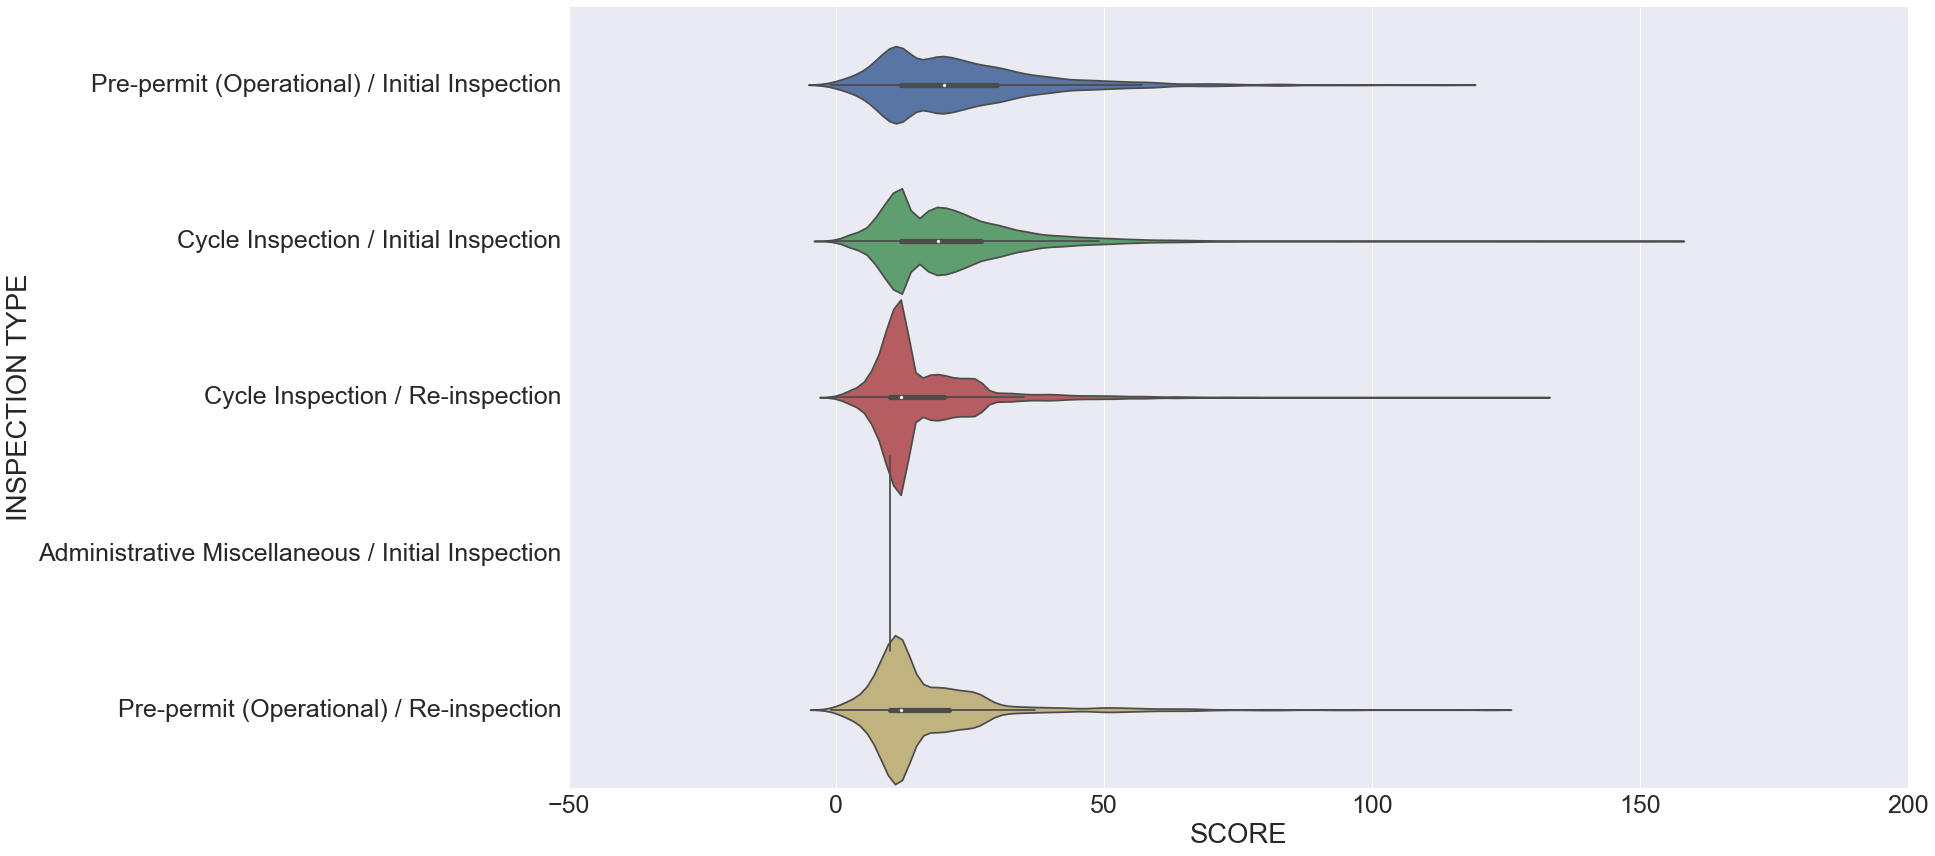

In [19]:
sns.set(font_scale=2.5)
f, ax = plt.subplots(figsize=(24, 14))
sns.violinplot(data=inspect[inspect['INSPECTION TYPE'].isin(top_5)], # DataFrame to map.
               y='INSPECTION TYPE',
               x='SCORE',
#                order=sort_order, # Can/must be specified manually. Will be by number of observations otherwise.
#                cut=0, # Cuts off values exactly at the end of the charting.
#                bw=.2, # Changes the smoothness of the resultant curve.
               orient="h",
               width=1.25
              )

An interesting recipe: 

In [20]:
inspect = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

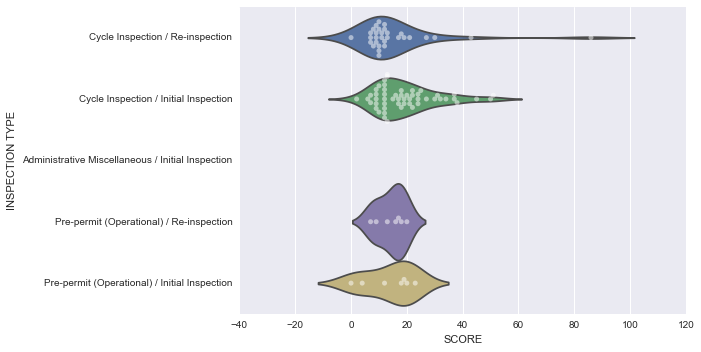

In [29]:
sns.set(font_scale=1)
dat = inspect[inspect['INSPECTION TYPE'].isin(top_5)].sample(100)
sns.violinplot(x='SCORE', y='INSPECTION TYPE', data=dat, orient="h", width=1.25, inner=None)
sns.swarmplot(x="SCORE", y="INSPECTION TYPE", data=dat, color="w", alpha=.5)

## Actually reads tutorial...

In [22]:
import numpy as np

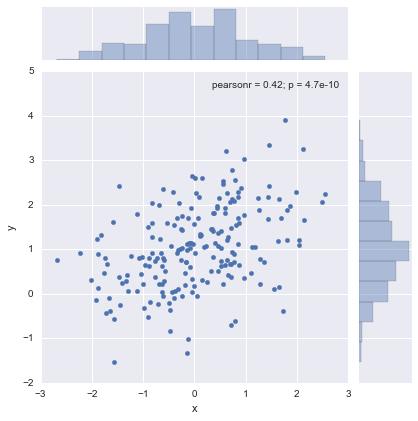

In [30]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);